# Lab 8: Define and Solve an ML Problem of Your Choosing

In [34]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [45]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(airbnbDataSet_filename)
# YOUR CODE HERE
print(df.shape)
df.head()

(28022, 50)


,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

The data i have is the census data from 1994 .
I will be predicting the prices of the AirBnb based on the features . So label = prices of Airbnb 
This is a supervised problem as we have the input features and the label which we are predicting .
This is a regression problem as we are predicting a continous number of the prices of AirBnB and not a category or a yes or no value.

My features are : features = 'host_response_rate','host_acceptance_rate','host_is_superhost','host_listings_count','host_total_listings_count','host_has_profile_pic',
    'host_identity_verified',
    'neighbourhood_group_cleansed',
    'room_type',
    'accommodates',
    'bathrooms',
    'bedrooms',
    'beds',
    'minimum_nights',
    'maximum_nights',
    'minimum_minimum_nights',
    'maximum_minimum_nights',
    'minimum_maximum_nights',
    'maximum_maximum_nights',
    'minimum_nights_avg_ntm',
    'maximum_nights_avg_ntm',
    'has_availability',
    'availability_30',
    'availability_60',
    'availability_90',
    'availability_365',
    'number_of_reviews',
    'number_of_reviews_ltm',
    'number_of_reviews_l30d',
    'review_scores_rating',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value',
    'instant_bookable',
    'calculated_host_listings_count',
    'calculated_host_listings_count_entire_homes',
    'calculated_host_listings_count_private_rooms',
    'calculated_host_listings_count_shared_rooms',
    'reviews_per_month', 'name',
 'description',
 'neighborhood_overview',
 'host_name',
 'host_location',
 'host_about',
 'amenities',
 'n_host_verifications'



This is an important problem as fair prediction of pricing can help customer, airbnb and the host to have a competitive price according to the market . For customers this can insure fair and transparent pricing rates which can prevent overpaying as well leading them to engage with AirBnB more often which can beneficial for the company's growth as well as the host can get the accurate pricing to thier property and this can lead to helpful suggestion in how to price your property in near future with nice features which can help them gain more booking. Also prediction of AirBnB price of a specific place can also outsiders see trends amomg the prices and the neighbourhood .



## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [46]:
# YOUR CODE HERE
X = df.drop('price',axis=1) # Dropping the price as it is our label and not the feature
y = df['price']      # Setting 'price' as our label 
print(X.dtypes)      # Checking the data type of our feature columns
print("The label data type is :" ,y.dtypes) #Checking the data type of our label

print(X.isnull().sum().sort_values(ascending=False)) #Check for column which has missing values 

to_drop = ['name','host_name','host_location'] # These are the features I decided to drop 
X = X.drop(columns = to_drop)

numeric_filling_cols = ['host_response_rate','host_acceptance_rate','bedrooms','beds'] # To fill the missing numeric value with median
for i in numeric_filling_cols :
    median_value = X[i].median() # computing median 
    X[i].fillna(median_value, inplace=True) # replacing with the median
    print("Filled missing values in" ,i, "with median value" , median_value)




name                                             object
description                                      object
neighborhood_overview                            object
host_name                                        object
host_location                                    object
host_about                                       object
host_response_rate                              float64
host_acceptance_rate                            float64
host_is_superhost                                  bool
host_listings_count                             float64
host_total_listings_count                       float64
host_has_profile_pic                               bool
host_identity_verified                             bool
neighbourhood_group_cleansed                     object
room_type                                        object
accommodates                                      int64
bathrooms                                       float64
bedrooms                                        

In [47]:
bool_cols = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable', 'has_availability'] #Converting boolean value to binary digits of 0 and 1 
for col in bool_cols:
    X[col] = X[col].astype(int)

cat_cols = ['room_type', 'neighbourhood_group_cleansed'] #one hot encode columns , dropping the first to avoid dummy variable trap
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)
print(X.columns) #printing the columns



Index(['description', 'neighborhood_overview', 'host_about',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'amenities', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_rating',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_coun

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

1. Yes i decided to update my feature list after the inspection of my data , i decided to drop name, host_name and host_location as they dont provide any context to the prediction of the prices and are identifiers for the Airbnb . My new features list is :
 'description', 'neighborhood_overview', 'host_about',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'amenities', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_rating',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
       'n_host_verifications', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room',
       'neighbourhood_group_cleansed_Brooklyn',
       'neighbourhood_group_cleansed_Manhattan',
       'neighbourhood_group_cleansed_Queens',
       'neighbourhood_group_cleansed_Staten Island'

2. Fix missing values of columns : Some of the columns when i was examining the data had missing values ,which causes problem for our ML model . So to tackle that we filled missing entries with an empty strings 
   Boolean to Numeric 0/1 conversion : Converted true/false into 0 and 1 so that model can process them as numerical values 
   One hot Encoding : Transforming categorical columns into binary columns to represent each category numerically.
   Tf-IDf (Text vectorization) : Converting text into numbers so that we can help our model represent importance of each word for prediction
   Feature Combination : Combined all numeric, encoded, and text features into a single matrix that the model can learn from.

3. I planned to use Linear Regression as model to predict the continous label of price, after that i will try using decision tree regressor which can capture the non linear aspect of the data as in if there are some relationship between features that our baseline model might have missed  , comparing these two will help me analyze if a flexible model like DT is more suitable than a basic linear model .
Finally I will test with Random Forest Regressor which build an ensemble of forest which can help us further minimize overfitting and generalization as each tree is trained with a random part of data which means differnet trees grow by using different sample and features which means less error will likely to occur.

4.To begin my plan is to use to use Linear Regression model to check whether the features have a linear correlation with the prices of the AirBnB , if the model gives me a poor prediction and i will analyze the prediction through MSE,MAE and R2 results . Then i plan to work on Decision Tree as this model will help me evaluate if there is a non linear relationship between the features and the label . Also this model is fairly easier to understand as it can help split the data into meaninful reigons as in if the number of bathroom is more than 2 or less, i plan to analyze the prediction through MSE,MAE and R2 . In this model i will try to use the log so that transformation can help me stabilize variance and make the data more normally distributed. Since DT might overfit the data 
I plan to move on to another model which is Random Tree which works on the idea of DT but it creates ensemble of multiple trees where each tree are trained on specific random part of Data which can be a huge plus point as this model will help us overfit less and generalize the model even more . To further improve i plan to validate the model using cross-validation and analyze the results using MAE, MSE, and R² metrics.


   

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [48]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy import sparse
from scipy.sparse import hstack

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [49]:
# YOUR CODE HERE

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 ,random_state = 42) # train_test_split the data in 80% for training and 20% for testing 




In [50]:
tfidf_vectorizers = {}
tfidf_train_matrices = []
tfidf_test_matrices = []

text_cols = ['description', 'neighborhood_overview', 'host_about', 'amenities']
for col in text_cols:
    X_train[col] = X_train[col].fillna("")
    X_test[col] = X_test[col].fillna("")
    
    tfidf = TfidfVectorizer(max_features=500, stop_words='english')
    tfidf_train = tfidf.fit_transform(X_train[col])
    tfidf_test = tfidf.transform(X_test[col])
    tfidf_vectorizers[col] = tfidf
    tfidf_train_matrices.append(tfidf_train)
    tfidf_test_matrices.append(tfidf_test)

# 4. Get non-text features for train and test
X_train_non_text = X_train.drop(columns=text_cols)
X_test_non_text = X_test.drop(columns=text_cols)

# 5. Convert non-text features to sparse matrices
X_train_non_text_sparse = sparse.csr_matrix(X_train_non_text.values)
X_test_non_text_sparse = sparse.csr_matrix(X_test_non_text.values)

# 6. Combine non-text and text features for train and test
X_train_final = hstack([X_train_non_text_sparse] + tfidf_train_matrices)
X_test_final = hstack([X_test_non_text_sparse] + tfidf_test_matrices)

print("Train features shape:", X_train_final.shape)
print("Test features shape:", X_test_final.shape)

Train features shape: (22417, 2047)
Test features shape: (5605, 2047)


In [51]:
ar_model = LinearRegression()
ar_model.fit(X_train_final,y_train)

y_pred_ar = ar_model.predict(X_test_final) # prediction

mean_ar = mean_absolute_error(y_test,y_pred_ar)
mse_ar = mean_squared_error(y_test,y_pred_ar)
r2_ar = r2_score(y_test,y_pred_ar)

print("Linear Regression results:")
print ("MAE:" , mean_ar)
print ("MSE : " ,mse_ar)
print ("R^2 score :" , r2_ar)



Linear Regression results:
MAE: 87.96413616314163
MSE :  18454.581294259733
R^2 score : 0.023018219545319463


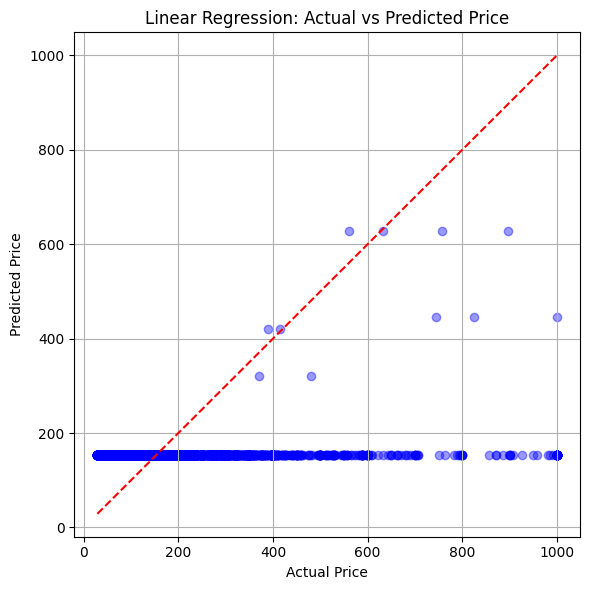

In [52]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_ar, alpha=0.4, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect prediction line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression: Actual vs Predicted Price")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
Analyzation : So from the above results and plot we found that our linear regression model , our mean absolute error came out to be 87 which means  
our average prediction for AirBnb were off by $87 , also our MSE was relatively high which means some larger prediction error . The R^2 score was very
 low as well 0.02 which means model was only able to explain 2% variance in prices of the dataset which means our features and label relationship is not linear and 
very complex cause of which are using DT as our next model.

In [53]:
#Initialize the Decision Tree Regressor Model
y_train_log = np.log1p(y_train)
dt_model = DecisionTreeRegressor(max_depth=10,min_samples_split=10,min_samples_leaf=5,random_state=42)
dt_model.fit(X_train_final,y_train_log)

y_pred_dt_log = dt_model.predict(X_test_final)
y_pred = np.expm1(y_pred_dt_log)

mae_dt = mean_absolute_error(y_test, y_pred)
mse_dt = mean_squared_error(y_test, y_pred)
r2_dt = r2_score(y_test, y_pred)

print("Decision Tree results:")
print ("MAE:" , mae_dt)
print ("MSE : ",mse_dt)
print ("R^2 score :" , r2_dt)


Decision Tree results:
MAE: 52.02987957310347
MSE :  10118.642028031903
R^2 score : 0.46432114894933396


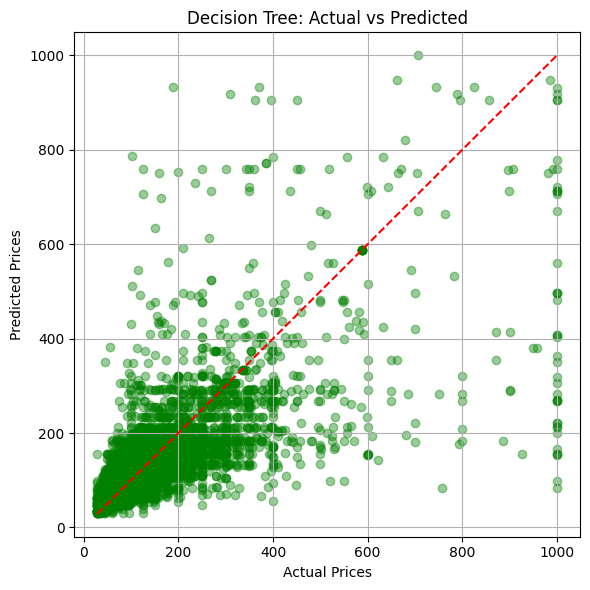

In [54]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.4, color='green')  # y_pred_dt = predictions from DT
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect prediction line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Decision Tree: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

In [55]:
y_train_log = np.log1p(y_train)
# Random Forest Regressor Initialization

# Define parameter grid
param_grid = {'n_estimators': [50],'max_depth': [5, 10],'min_samples_split': [2]}


# Initialize the base model
rf_base = RandomForestRegressor(random_state=42)

# Grid Search with 3-fold Cross Validation
grid_search = GridSearchCV(estimator=rf_base, param_grid=param_grid,cv=2, scoring='neg_mean_absolute_error',n_jobs=-1, verbose=0)
grid_search.fit(X_train_final, y_train_log)

# Best model
best_rf_model = grid_search.best_estimator_

# Predict and evaluate
y_pred_log = best_rf_model.predict(X_test_final)
y_pred = np.expm1(y_pred_log)


mae_rf = mean_absolute_error(y_test, y_pred)
mse_rf = mean_squared_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)

print("Random Forest (Tuned) results:")
print("Best Parameters:", grid_search.best_params_)
print("MAE:", mae_rf)
print("MSE:", mse_rf)
print("R²:", r2_rf)


Random Forest (Tuned) results:
Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
MAE: 45.84887378545215
MSE: 7876.329372451389
R²: 0.5830287248977802


In [ ]:
From the results we can see we did improve from the previous model where our MSE came out to be 45 which means we are 45$ off in the prediction and r^2 
About 58.3% of the variation in Airbnb prices is being explained by your model. That’s quite decent, especially for a real-world dataset.



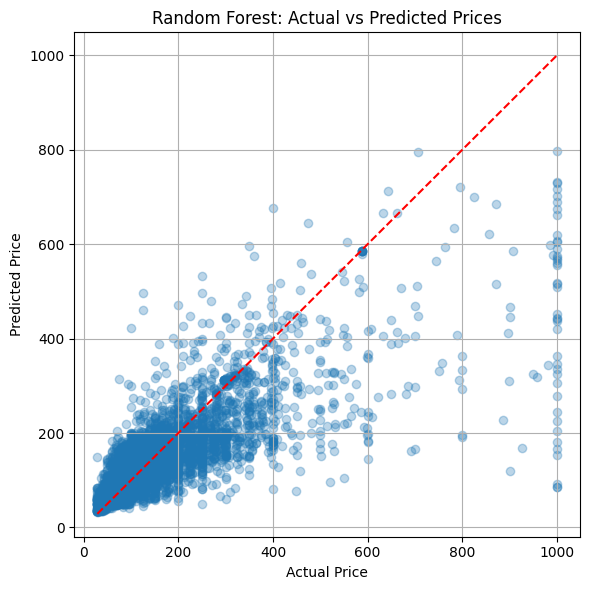

In [56]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Random Forest: Actual vs Predicted Prices')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
As we can see from the plot as well most of our prediction from the test data are around the real perfect line which means we 